# Importing and Loading

### Importing relevant libs

In [85]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set()

### Reading dataset

In [96]:
data_store = pd.read_csv('./data/store.csv') 
data_train = pd.read_csv('./data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
data_test = pd.read_csv('./data/test.csv', parse_dates = True, low_memory = False, index_col = 'Date')

# Dataset Exploration

## Knowing the data

### Data exploration pipeline

In [46]:
class ExploreData():
    '''Print info, head, shape, missing values of a dataset
    Parameter:
        data DataFrame: pandas dataframe
    '''
    
    def __init__(self, data):
        self.data = data
    
    def __str__(self):
        self.summary()
        return ''
    
    def data(self):
        '''Return the dataset of current instance'''
        return self.data
    
    def summary(self):
        '''print summary of the dataset'''
        self.info()
        self.divider()
        self.head()
        self.divider()
        self.shape()
        self.divider()
        self.missing_values()
    
    def divider(self):
        '''print a horzontal line'''
        display(Markdown('---'))
    
    def info(self):
        '''print a concise summary of a DataFrame'''
        print('\nDataframe summary')
        display(self.data.info())

    def head(self, n=5):
        '''print out the first 5 rows of a dataframe'''
        print('\nFirst 5 rows')
        display(self.data.head(n))

    def shape(self):
        '''print out shape of a dataframe'''
        print('\nShape of the dataset')
        display(self.data.shape)

    def missing_values(self):
        '''print out count of  missing value of a dataframe'''
        print('\nMissing values count')
        display(self.data.isna().sum())

### Training dataset exploration

In [47]:
print(ExploreData(data_train))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


None

---


First 5 rows


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


---


Shape of the dataset


(1017209, 8)

---


Missing values count


Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Store dataset exploration

In [48]:
print(ExploreData(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Missing value treatment

Training dataset has no missing values.

CompetitionDistance has 3 missing values in `store dataset`. Since they are small we can impute them with median

Other values in `store dataset` that are missing have meaning by themselves. For instance,  CompetitionOpenSinceMonth and CompetitionOpenSinceYear missing values can mean that competition for a store has already been there before the store established thus, their start month and year is unknow. We will fill this values with 0. 

In [99]:
data_store['CompetitionDistance'].fillna(data_store['CompetitionDistance'].median(), inplace = True)

In [101]:
data_store.fillna(0, inplace = True)

Closed stores with zero sales

In [103]:
data_train_clean[(data_train_clean.Open == 0) & (data_train_clean.Sales == 0)].shape

(172817, 8)

Opened stores with zero sales

In [104]:
data_train_clean[(data_train_clean.Open != 0) & (data_train_clean.Sales == 0)].shape

(54, 8)

There are 1723817 store that are closed and has no sales. That is almost 10% of the dataset. To avoid biase forecast we will drop this values. 

Only 54 stores are opended and has no sales. 54 is very small number compared to the dataset, we can consider this as an exceptional days.

In [110]:
data_train_clean = data_train_clean[(data_train_clean.Open != 0) & (data_train_clean.Sales != 0)]
data_train_clean.shape

(787975, 8)

## Outlier treating pipeline

In [54]:
from scipy.stats import zscore

class Outlier:

    def __init__(self, dataset):
        self.dataset = dataset

    def z_score_univariate(self, variable):
        z_scores = zscore(variable)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)
        return self.dataset[filtered_entries].copy()

    def z_score_multivariate(self, variables):
        z_scores = zscore(variables)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3).all(axis=1)
        return self.dataset[filtered_entries].copy()

    def iqr_univariate(self, variable):
        Q1=variable.quantile(0.25)
        Q3=variable.quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        return self.dataset[(variable < Upper_Whisker)].copy()

### Detecting outliners

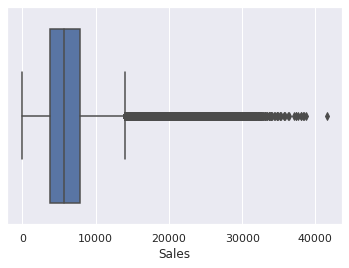

In [86]:
sns.boxplot(data_train.Sales)

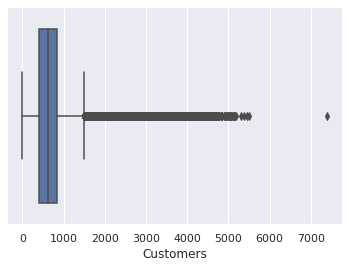

In [56]:
sns.boxplot(data_train.Customers)

### Treating outliers on training data

Using Interquartile Ranges we will remove outliers from the training dataset

In [125]:
# Removing outliers from training dataset using Sales as a parameter
data_clean_sales = Outlier(data_train_clean).iqr_univariate(data_train_clean.Sales)

# Removing outliers from training dataset using Customers as a parameter
data_train_clean = Outlier(data_clean_sales).iqr_univariate(data_clean_sales.Customers)
data_train_clean.shape

(769484, 8)

## Seasonality analysis of training set

In [207]:
# data extraction
data_train_clean['Year'] = data_train_clean.index.year
data_train_clean['Month'] = data_train_clean.index.month
data_train_clean['Day'] = data_train_clean.index.day
data_train_clean['WeekOfYear'] = data_train_clean.index.weekofyear
data_train_clean['DayOfWeek'] = data_train_clean.index.dayofweek

# adding new variable
data_train_clean['SalePerCustomer'] = data_train_clean['Sales']/data_train_clean['Customers']
data_train_clean['SalePerCustomer'].describe()

count    795005.000000
mean          9.575309
std           2.115504
min           0.000000
25%           7.989940
50%           9.336761
75%          10.947165
max          51.694444
Name: SalePerCustomer, dtype: float64

### Joining store and train datasets

In [210]:
data_train_store = pd.merge(data_train_clean, data_store, how = 'inner', on = 'Store')
data_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,3,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,2,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,1,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,0,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### By store type

In [134]:
data_train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,428222.0,6381.755491,2425.186883,0.0,4592.0,6075.0,7903.0,14049.0
b,5158.0,5777.087437,1886.744114,0.0,4422.0,5606.5,7047.5,12470.0
c,106854.0,6514.357946,2261.597872,0.0,4830.0,6237.0,7957.0,14049.0
d,254823.0,6673.712357,2254.805596,0.0,5029.0,6350.0,8022.0,14048.0


In [136]:
data_train_store.groupby('StoreType')['Customers', 'Sales'].sum()

/home/ns/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Customers,Sales
StoreType,,
a,310897004,2732808100
b,5475371,29798217
c,81877557,696085204
d,152239985,1700615404


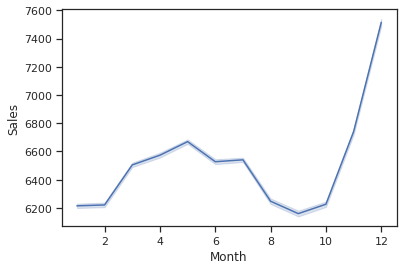

In [307]:
sns.lineplot(x = data_train_clean.Month, y = data_train_clean.Sales)
plt.savefig('week5.png')

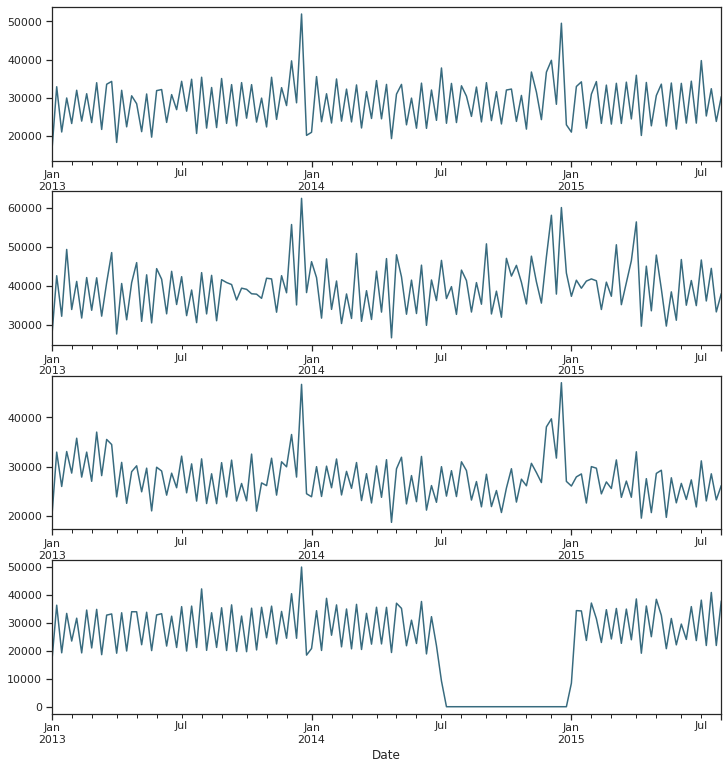

In [314]:
data_train_clean['Sales'] = data_train_clean['Sales'] * 1.0

# store types
sales_a = data_train_clean[data_train_clean.Store == 2]['Sales']
sales_b = data_train_clean[data_train_clean.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = data_train_clean[data_train_clean.Store == 1]['Sales']
sales_d = data_train_clean[data_train_clean.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

### Befor, after, during

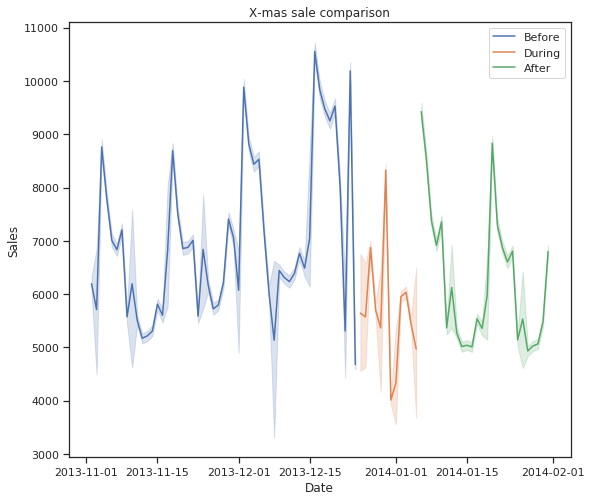

In [327]:
before_xmas = data_train_clean[(data_train_clean.index > '2013-11-01') & (data_train_clean.index < '2013-12-25') ].Sales
during_xmas = data_train_clean[(data_train_clean.index >= '2013-12-25') & (data_train_clean.index <= '2014-01-05') ].Sales
after_xmas = data_train_clean[(data_train_clean.index > '2014-01-05') & (data_train_clean.index < '2014-02-01') ].Sales

plt.subplots(figsize = (9, 8))

sns.lineplot(x = before_xmas.index, y = before_xmas, label='Before')
sns.lineplot(x = during_xmas.index, y = during_xmas, label='During')
sns.lineplot(x = after_xmas.index, y = after_xmas, label='After').set_title('X-mas sale comparison')

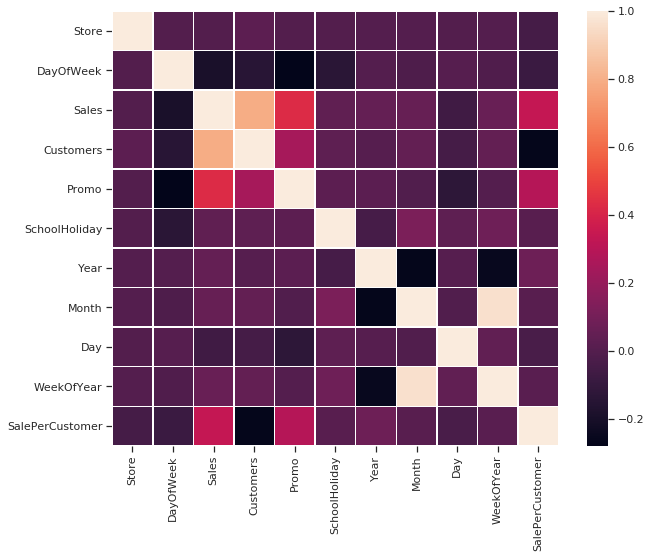

In [294]:
corr = data_train_clean.drop('Open', axis=1).corr()

plt.subplots(figsize = (10, 8))

sns.heatmap(corr, linewidths = .5)      
plt.show()

/home/ns/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


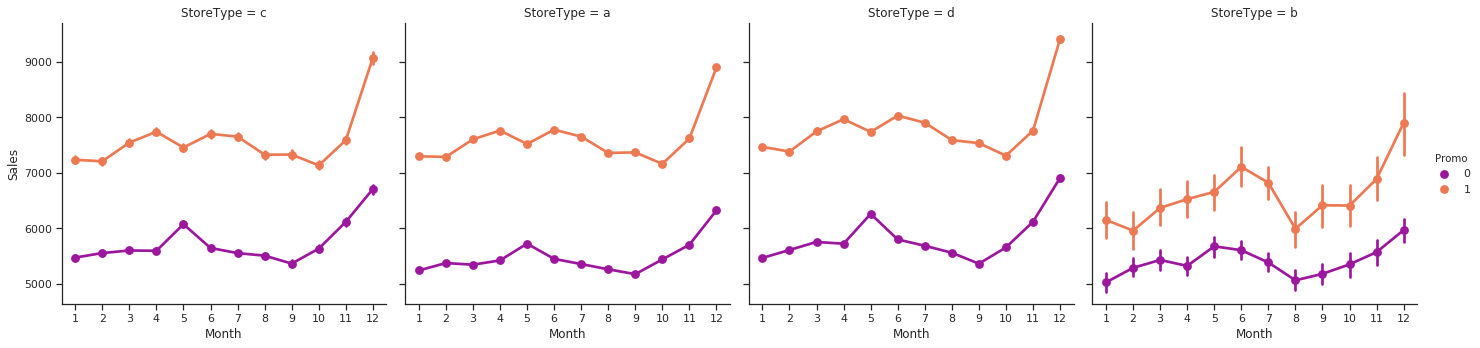

In [349]:
# sns.factorplot(data = data_train_store, x = 'Month', y = 'Sales', col='Promo', hue='Promo')
sns.factorplot(data = data_train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
#                row = 'Promo', # per promo in the store in rows
               color = c, title='Promotion impact on store types')

plt.savefig('pr_.png')

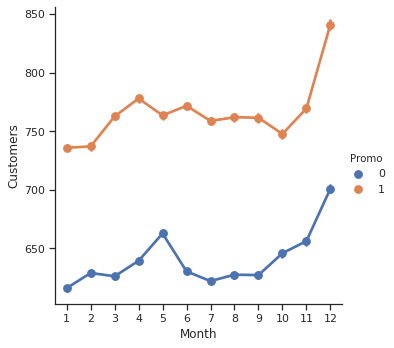

In [343]:
sns.factorplot(data = data_train_clean, x = 'Month', y = 'Customers',  hue='Promo')

/home/ns/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


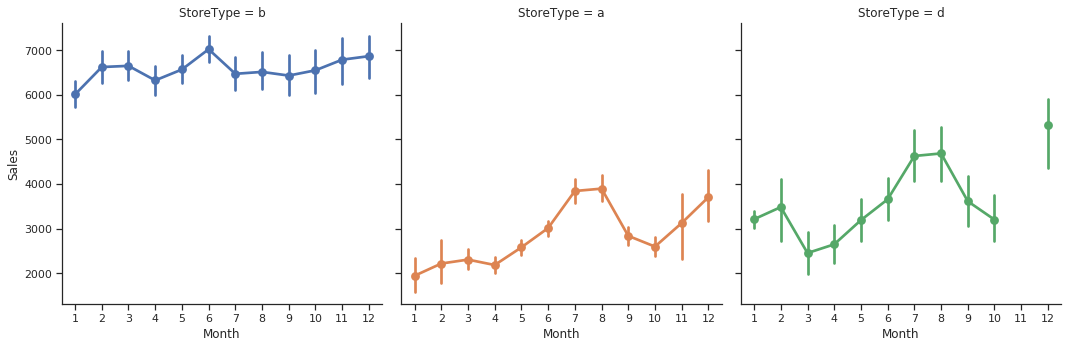

In [345]:
weekend_open = data_train_store[data_train_store.DayOfWeek.isin([6,7])]
sns.factorplot(data = weekend_open, x = 'Month', y = 'Sales', col='StoreType', hue='StoreType')

/home/ns/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


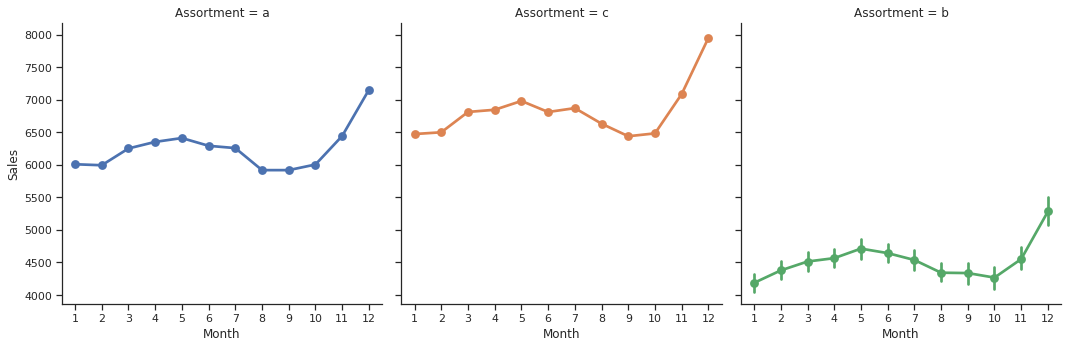

In [346]:
sns.factorplot(data = data_train_store, x = 'Month', y = 'Sales', col='Assortment', hue='Assortment')

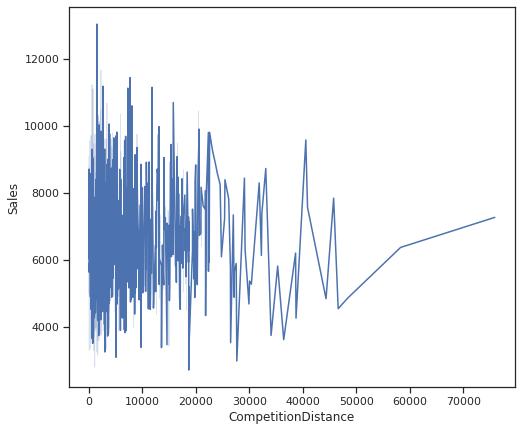

In [355]:
a = data_train_store.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.lineplot(x = a['CompetitionDistance'], y=a['Sales'])
plt.savefig('dis.png')